# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Step 2: Load the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

# Replace with your file name
df = pd.read_csv("Housing.csv")
df.head()


Saving Housing.csv to Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Step 3: Preprocessing
Convert categorical variables using one-hot encoding

In [3]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


 Define features and target

In [4]:
X = df_encoded.drop(columns='price')
y = df_encoded['price']

 Standardize numerical features (area, bedrooms, bathrooms, stories, parking)


In [5]:
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Step 4: Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Train Models
 Linear Regression

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Gradient Boosting Regressor

In [8]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Step 6: Evaluation

In [9]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name}:\n - MAE: {mae:.2f}\n - RMSE: {rmse:.2f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting")

Linear Regression:
 - MAE: 970043.40
 - RMSE: 1324506.96

Gradient Boosting:
 - MAE: 960101.15
 - RMSE: 1298451.32




# Step 7: Visualization

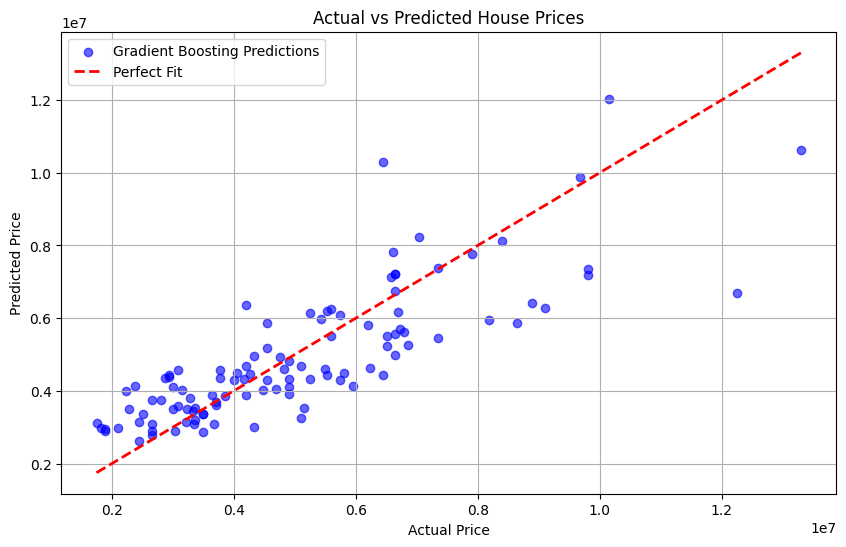

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.6, label="Gradient Boosting Predictions", color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()